#  Global CO₂ Emissions Tracker – ETL & Cleaning Notebook

This notebook performs the **ETL (Extract, Transform, Load)** phase for the OWID CO₂ Emissions dataset.

It prepares a cleaned dataset for use in a **Tableau dashboard** showing global emissions trends by sector, population, and economic output.

---
##  Objective:
- Load the raw CSV from OWID
- Drop irrelevant columns
- Apply tiered filtering (essential, derived, optional)
- Recalculate or impute missing metrics where possible
- Save a cleaned CSV for dashboard building

## 1. Import Required Libraries

We'll use Pandas and NumPy for loading and processing the dataset.


## 2. Load Dataset

The dataset is sourced from Our World in Data's [CO₂ and Greenhouse Gas Emissions repository](https://github.com/owid/co2-data).  
Renamed as emissions_raw.csv


In [66]:
import pandas as pd

# Load the dataset (make sure it's in your project folder)
df = pd.read_csv("data/emissions_raw.csv")

# Show first few rows
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Explore Data

We'll check the shape, inspect column names, and identify null values.

In [67]:
# 3. Inspect
print(df.shape)
print(df.columns.tolist())

(50191, 79)
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_p

## 4. Drop Irrelevant Columns & Handle Missing Values

We’ll focus on:
- Overall CO₂ (`co2`)
- Per capita and per GDP emissions
- Filtering out rows with missing critical data

In [68]:
drop_cols = [
    'iso_code', 'cement_co2_per_capita', 'co2_growth_abs', 'co2_growth_prct',
    'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
    'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
    'co2_per_unit_energy', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
    'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc',
    'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
    'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp',
    'flaring_co2_per_capita', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita',
    'ghg_per_capita', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita',
    'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita',
    'other_industry_co2', 'primary_energy_consumption', 'share_global_cement_co2',
    'share_global_co2', 'share_global_co2_including_luc', 'share_global_coal_co2',
    'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
    'share_global_cumulative_co2_including_luc', 'share_global_cumulative_coal_co2',
    'share_global_cumulative_flaring_co2', 'share_global_cumulative_gas_co2',
    'share_global_cumulative_luc_co2', 'share_global_cumulative_oil_co2',
    'share_global_cumulative_other_co2', 'share_global_flaring_co2', 'share_global_gas_co2',
    'share_global_luc_co2', 'share_global_oil_co2', 'share_global_other_co2',
    'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4',
    'temperature_change_from_co2', 'temperature_change_from_ghg',
    'temperature_change_from_n2o', 'total_ghg_excluding_lucf', 'trade_co2', 'trade_co2_share'
]
df = df.drop(columns=drop_cols, errors='ignore')


Excluded cumulative and global share metrics which weren’t critical to the sectoral dashboard view. This reduced column complexity from 79 to under 15 without losing analysis power.

In [69]:
# Check top 20 columns by missing values
df.isnull().sum().sort_values(ascending=False).head(20)

gdp                    34940
flaring_co2            34239
co2_per_gdp            32663
gas_co2                32177
coal_co2               28436
oil_co2                24973
co2_per_capita         24009
cement_co2             21328
co2                    21054
land_use_change_co2    12955
total_ghg              12781
population              9172
country                    0
year                       0
dtype: int64

## 4. Drop Irrelevant Columns & Handle Missing Values

We’ll focus on:
- Overall CO₂ (`co2`)
- Per capita and per GDP emissions
- Filtering out rows with missing critical data
while allowing flexibility for optional columns to boost both data depth and visual clarity. Let's simplify with a Priority Pyramid Approach that focuses on critical columns first while preserving maximum data.

In [70]:
# Keep only modern data and essential identifiers
df = df[df['year'] >= 2000]
df = df.dropna(subset=['country', 'year', 'co2'])
print(f"Rows after Tier 1 cleaning: {len(df)}")

Rows after Tier 1 cleaning: 5928


In [71]:
# Calculate co2_per_capita where population exists
mask = df['population'].notnull()
df.loc[mask, 'co2_per_capita'] = df.loc[mask, 'co2'] / df.loc[mask, 'population']

# Calculate co2_per_gdp where GDP exists
mask = df['gdp'].notnull()
df.loc[mask, 'co2_per_gdp'] = df.loc[mask, 'co2'] / df.loc[mask, 'gdp']

print(f"Missing co2_per_capita after calc: {df['co2_per_capita'].isnull().sum()}")
print(f"Missing co2_per_gdp after calc: {df['co2_per_gdp'].isnull().sum()}")

Missing co2_per_capita after calc: 384
Missing co2_per_gdp after calc: 1778


**Alternatives for handling still missing values in our derived metrics**
- recalculated missing values
- used progressive imputation

In [72]:

# Fill co2_per_capita by median per country
df['co2_per_capita'] = df.groupby('country')['co2_per_capita'].transform(
    lambda x: x.fillna(x.median())
)

# Fill any leftovers with global median
df['co2_per_capita'] = df['co2_per_capita'].fillna(df['co2_per_capita'].median())

print("Current missing values:")
print(df[['co2_per_capita','co2_per_gdp']].isnull().sum())

Current missing values:
co2_per_capita       0
co2_per_gdp       1778
dtype: int64


In [73]:
# CELL 4: IMPUTATION WITH VALIDATION
# ----------------------------------
import warnings
warnings.filterwarnings('ignore', 'Mean of empty slice')
# Input: Cleaned dataframe (post-Tier 1/2)
# Output: Dataframe with filled values
# Checks: Null reduction report

# 1. Capture original state
original_co2_per_capita = df['co2_per_capita'].copy()
original_co2_per_gdp = df['co2_per_gdp'].copy()

# 2. imputation code
df['co2_per_capita'] = df.groupby('country')['co2_per_capita'].transform(
    lambda x: x.fillna(x.median())
).fillna(df['co2_per_capita'].median())

df['co2_per_gdp'] = df.groupby('country')['co2_per_gdp'].transform(
    lambda x: x.fillna(x.median())
).fillna(df['co2_per_gdp'].median())

# 3. Retroactive sanity check
print("co2_per_capita changes:")
print(f"Nulls before: {original_co2_per_capita.isnull().sum()}")
print(f"Nulls after: {df['co2_per_capita'].isnull().sum()}\n")

print("co2_per_gdp changes:")
print(f"Nulls before: {original_co2_per_gdp.isnull().sum()}")
print(f"Nulls after: {df['co2_per_gdp'].isnull().sum()}")

co2_per_capita changes:
Nulls before: 0
Nulls after: 0

co2_per_gdp changes:
Nulls before: 1778
Nulls after: 0


##### Conclusively, Missing values in derived metrics were filled using country medians where available, with global medians as fallback.

### Handling energy columns as a bonus to visualize sector-wise emissions
- compare energy types on dashboard.
- additionally, handle by a threshold filter.

In [74]:
for col in ['gas_co2', 'coal_co2', 'oil_co2']:
    df[col] = df.groupby('country')[col].transform(lambda x: x.fillna(x.median()))
    df[col] = df[col].fillna(df[col].median())

# Remove columns with >50% missing data
missing_threshold = 0.5
df = df.loc[:, df.isnull().mean() < missing_threshold]
print(f"Final columns kept: {df.columns.tolist()}")

# Before/After missing values
print("Missing values remaining:\n", df.isnull().sum())

Final columns kept: ['country', 'year', 'population', 'gdp', 'cement_co2', 'co2', 'co2_per_capita', 'co2_per_gdp', 'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'total_ghg']
Missing values remaining:
 country                   0
year                      0
population              480
gdp                    2146
cement_co2              490
co2                       0
co2_per_capita            0
co2_per_gdp               0
coal_co2                  0
flaring_co2             240
gas_co2                   0
land_use_change_co2     864
oil_co2                   0
total_ghg               816
dtype: int64


In [75]:
#due to vsc/pylance limitation:
# Combined Tier 1 Handling
if 'population' not in df.columns:
    raise KeyError("Population column missing!")

# Single transformation with type hint
df['population'] = (
    df.groupby('country', group_keys=False)['population']
    .apply(lambda x: x.fillna(x.median()))
    .fillna(df['population'].median())  # type: ignore
)

# Tier 2/3 (Same as Before)
for col in ['cement_co2', 'flaring_co2']:
    if col in df.columns:
        df[col] = df[col].fillna(df.groupby(col)[col].transform('median'))

df = df.dropna(subset=['population', 'cement_co2'])

array([[<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'cement_co2'}>]], dtype=object)

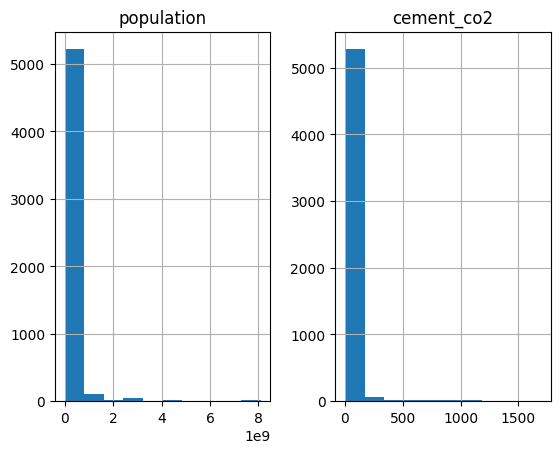

In [76]:
import matplotlib.pyplot as plt
df[['population', 'cement_co2']].hist()

##  Final Export

The final dataset includes 14 key columns and 5,000+ rows across 2000–2022.

- `co2`, `co2_per_capita`, `co2_per_gdp` are fully cleaned
- Energy sector emissions (`coal_co2`, `gas_co2`, etc.) are partially imputed
- Columns with >50% missingness were dropped

We now export this dataset for Tableau.

In [77]:
# Export cleaned dataset
df.to_csv("data/cleaned_emissions_data.csv", index=False)
print(" Final cleaned data saved!")

 Final cleaned data saved!
